In [386]:
import pandas_datareader as pdr
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy import stats

In [314]:
# get data from yahoo
def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start = startdate, end = enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys = tickers, names = ['Ticker', 'Date']))

In [315]:
# call the function
tickers = ['^NYA', '^N225', '000001.SS']
mkt_index = get(tickers, datetime.datetime(2017, 10, 1), datetime.datetime(2018, 10, 20))

In [316]:
mkt_index.head(2)

High           Low          Open         Close  \
Ticker Date                                                                 
^NYA   2017-10-02  12265.389648  12200.129883  12209.160156  12264.660156   
       2017-10-03  12303.719727  12266.519531  12274.730469  12302.879883   

                         Volume     Adj Close  
Ticker Date                                    
^NYA   2017-10-02  3.199730e+09  12264.660156  
       2017-10-03  3.068850e+09  12302.879883

In [359]:
# calculate daily pct change of returns
mkt_index_close = mkt_index[['Close']]
mkt_index_returns = mkt_index_close / mkt_index_close.shift(1) - 1

# seperate indices returns
nyse_returns = mkt_index_returns.iloc[mkt_index_returns.index.get_level_values('Ticker') == '^NYA']
nyse_returns.index = nyse_returns.index.droplevel('Ticker')
# drop the first NA row
nyse_returns = nyse_returns.iloc[1:]

nikkei_returns = mkt_index_returns.iloc[mkt_index_returns.index.get_level_values('Ticker') == '^N225']
nikkei_returns.index = nikkei_returns.index.droplevel('Ticker')
nikkei_returns = nikkei_returns.iloc[1:]
shcomp_returns = mkt_index_returns.iloc[mkt_index_returns.index.get_level_values('Ticker') == '000001.SS']
shcomp_returns.index = shcomp_returns.index.droplevel('Ticker')
shcomp_returns = shcomp_returns.iloc[1:]

In [362]:
# concatenate indices returns
return_data = pd.concat([nyse_returns, nikkei_returns, shcomp_returns], axis = 1)
return_data.columns = ['NYSE', 'NIKKEI', 'SHCOMP']

# fill NA with 0
return_data.fillna(0, inplace = True)

In [391]:
# JB-test testing if returns follow normal distribution
stats.jarque_bera(nyse_returns), stats.jarque_bera(nikkei_returns), stats.jarque_bera(shcomp_returns)

((382.54551911351507, 0.0),
 (191.98478111945343, 0.0),
 (109.02453157246428, 0.0))

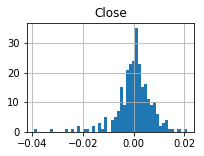

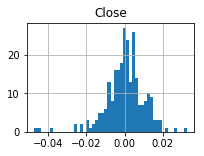

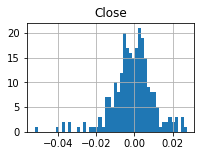

In [363]:
nyse_returns.hist(bins = 50, figsize = (3, 2))
nikkei_returns.hist(bins = 50, figsize = (3, 2))
shcomp_returns.hist(bins = 50, figsize = (3, 2))
plt.show()

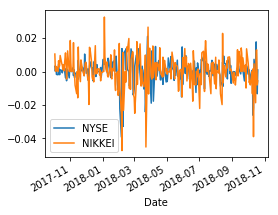

In [237]:
return_data.plot(figsize = (4, 3))
plt.show()

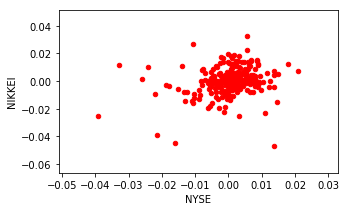

In [288]:
return_data.plot.scatter(x = 'NYSE', y = 'NIKKEI', c = ['red'], figsize = (5, 3))
plt.show()

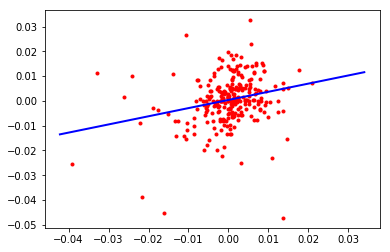

In [368]:
plt.plot(return_data['NYSE'], return_data['NIKKEI'], 'r.')
ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw = 2)
plt.show()

In [369]:
# OLS regression
x = sm.add_constant(return_data['NYSE'])
model = sm.OLS(return_data['NIKKEI'], x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 NIKKEI   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     16.84
Date:                Sun, 21 Oct 2018   Prob (F-statistic):           5.38e-05
Time:                        01:44:28   Log-Likelihood:                 883.81
No. Observations:                 273   AIC:                            -1764.
Df Residuals:                     271   BIC:                            -1756.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.667      0.505      -0.001       0.002
NYSE           0.3297      0.080      4.104      0.000       0.172       0.488
==============================================================================
Omnibus:                       61.506   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.498
Skew:                          -0.836   Prob(JB):                     1.11e-59
Kurtosis:                       7.591   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [394]:
x = y = np.array([None] * len(return_data))
for i in range(len(return_data)):
    x[i] = return_data.iloc[i][0]
    y[i] = return_data.iloc[i][1]

In [396]:
"""from sklearn.linear_model import LinearRegression as LR
model = LR()
model.fit(x, y)"""

'from sklearn.linear_model import LinearRegression as LR\nmodel = LR()\nmodel.fit(x, y)'